In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd


In [3]:
df=pd.read_csv('/Users/denistkachenko/Documents/marketing_AB.csv')
df.head()

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [194]:
if "Unnamed: 0" in df.columns:

    df = df.drop(["Unnamed: 0"], axis =1)

In [195]:
df.rename(columns=lambda x: x.strip().replace(" ", "_"), inplace=True)
df.head(1)

,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,1069124,ad,False,130,Monday,20


In [196]:
df["converted_int"] = df['converted'].apply(lambda x:1 if x== True  else  0)
df["converted_int"].sum()

14843

In [197]:
treatment = df.query('test_group == "ad"')
control = df.query('test_group == "psa"')

In [198]:
def permutation_test(df1, df2, n_permutations):
    observed_diff = np.abs(np.mean(df1) - np.mean(df2))
    all_data = np.concatenate([df1, df2])
    count = 0

    for _ in range(n_permutations):
        np.random.shuffle(all_data)
        new_diff = np.abs(np.mean(all_data[0:len(df1)]) - np.mean(all_data[len(df1):]))

        if new_diff >= observed_diff:
            count += 1

    p_value = count / n_permutations

    return p_value

n_permutations = 2000

df1 = treatment['converted_int']
df2 = control['converted_int']

p_value = permutation_test(df1, df2, n_permutations)
print(f'P-Value: {p_value}')

if p_value < 0.05:
    print("We reject null hypothesis. There is a significant difference between the two groups.")
else:
    print("We accept null hypothesis. There is no significant difference between the two groups.")



P-Value: 0.0
We reject null hypothesis. There is a significant difference between the two groups.


T-Test:
T-Statistic: 7.37040597428566
P-Value: 1.7033052627831264e-13

Chi-Squared Test:
Chi2 Statistic: 54.005823883685245
P-Value: 1.9989623063390075e-13


/var/folders/1w/5fknmcjj7_g7sfbf2lffwy1h0000gn/T/ipykernel_58129/3635184935.py:17: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/1w/5fknmcjj7_g7sfbf2lffwy1h0000gn/T/ipykernel_58129/3635184935.py:18: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




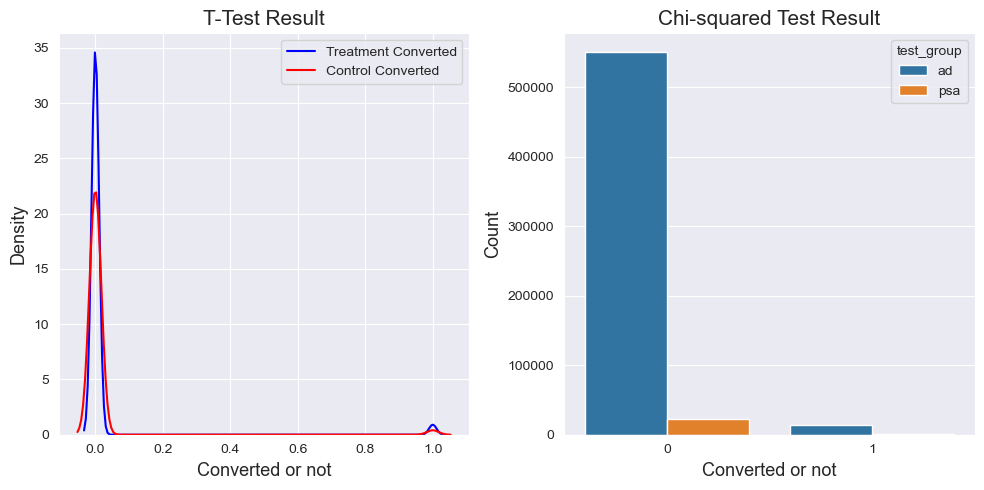

In [199]:
import seaborn as sns

#Performing t-test
t_stat, p_val_t = stats.ttest_ind(treatment['converted_int'], control['converted_int'])
print(f'T-Test:\nT-Statistic: {t_stat}\nP-Value: {p_val_t}\n')

#Performing chi-squared test
con_table = pd.crosstab(df['test_group'], df['converted_int'])
chi2, p_val_chi2, dof, expected = stats.chi2_contingency(con_table)
print(f'Chi-Squared Test:\nChi2 Statistic: {chi2}\nP-Value: {p_val_chi2}\n')

#Visualizing
plt.figure(figsize=(15, 5))

#T-Test result visualization
plt.subplot(1, 3, 1)
sns.distplot(treatment['converted_int'], hist = False, kde = True, color = 'blue', label="Treatment Converted")
sns.distplot(control['converted_int'], hist = False, kde = True, color = 'red', label="Control Converted")
plt.title('T-Test Result',fontsize=15)
plt.xlabel('Converted or not', fontsize=13)
plt.ylabel('Density', fontsize=13)
plt.legend()

#chi-square result visualization
plt.subplot(1, 3, 2)
sns.countplot(x='converted_int', hue='test_group', data=df)
plt.title('Chi-squared Test Result',fontsize=15)
plt.xlabel('Converted or not', fontsize=13)
plt.ylabel('Count', fontsize=13)

plt.tight_layout()
plt.show()
